In [1]:
#inputs

from matplotlib import pyplot as plt
# import scikitplot as skplt

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt


from collections import Counter


#first test submission
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
#DEFINE CONSTANTS
SHOW_DATA = 15                # how many data will be show
PERCISION = 5                # how many digits will be show: 2.123352135

def cm_to_inch(value):
    return value/2.54

plt.rcParams["figure.figsize"]=(cm_to_inch(15),cm_to_inch(10))

In [3]:
#load train and test data
train_data = pd.read_csv("../input/titanic/train.csv")
test_data = pd.read_csv("../input/titanic/test.csv")
train_data[:SHOW_DATA*2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#DEFINE CONSTANTS 2
COL_PASSID = "PassengerId"   # passengerid - Unic number of passenger (ID)
COL_SURVIVED = "Survived"    # survival - Survival (0 = No; 1 = Yes)
COL_PASSCLASS = "Pclass"     # class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
COL_NAME = "Name"            # name - Name
COL_SEX = "Sex"              # sex - Sex
COL_AGE = "Age"              # age - Age
COL_SIBSP = "SibSp"          # sibsp - Number of Siblings/Spouses Aboard
COL_PARCH = "Parch"          # parch - Number of Parents/Children Aboard
COL_TICKET = "Ticket"        # ticket - Ticket Number
COL_FARE = "Fare"            # fare - Passenger Fare
COL_CABIN = "Cabin"          # cabin - Cabin
COL_EPORT = "Embarked"       # embarked - Port of Embarkation 
                             # (C = Cherbourg; Q = Queenstown; S = Southampton)

In [5]:
#EXPLORE BASE: data types
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#EXPLORE BASE: shape info
train_data.shape

(891, 12)

In [7]:
#EXPLORE BASE: info about columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#EXPLORE BASE: info about NaN elements, in every column (in percentage)
train_data.isna().sum()/train_data.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
#As we see column "Cabins" contain a lot of missing data, so we will not use this column. What about column "Age", these missing values will be replaced by average values.
#Useless information about first label, delete them
# try:
#     train_data.drop(COL_CABIN, axis=1, inplace=True)
# except KeyError:
#     pass
# train_data[:SHOW_DATA]

In [10]:
# check conjecture of all female are survived

women = train_data.loc[train_data[COL_SEX] == 'female'][COL_SURVIVED]
men =  train_data.loc[train_data[COL_SEX] == 'male'][COL_SURVIVED]
rate_women = sum(women)/len(women)
rate_men = sum(men)/len(men)

print("% of women who survived:", round(rate_women*100,PERCISION))
print("% of men who survived:", round(rate_men*100,PERCISION))

% of women who survived: 74.20382
% of men who survived: 18.89081


In [11]:
# START EXPLORE FEATURES: CATEGORICAL FEATURES:
# survival - Survival (0 = No; 1 = Yes)
# class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# sex - Sex
# age - Age                                 // could be convert to age_group
# parch - Number of Parents/Children Aboard 
# fare - Passenger Fare                     // could be convert to fare_group
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
COL_CABIN_GROUP = COL_CABIN + "_Group"
COL_AGE_GROUP = COL_AGE + "_Group"
COL_AGE_SCALED = COL_AGE + "_Scaled"
COL_FARE_GROUP = COL_FARE + "_Group"
COL_SIBSP_GROUP = COL_SIBSP + "_Group"
COL_PARCH_GROUP = COL_PARCH + "_Group"
COL_TICKET_GROUP = COL_TICKET + "_Group"
COL_SIBSP_GROUP_2 = COL_SIBSP_GROUP + "_2"
COL_PARCH_GROUP_2 = COL_PARCH_GROUP + "_2"
COL_AGE_GROUP_2 = COL_AGE_GROUP + "_2"
COL_FARE_GROUP_2 = COL_FARE_GROUP + "_2"
COL_NAME_START_LETTER = "Name_First_Letter"

0    549
1    342
Name: Survived, dtype: int64

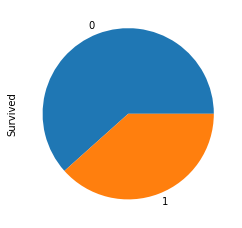

In [12]:
# EXPLORE FEATURES:
# Survival (0 = No; 1 = Yes)
train_data[COL_SURVIVED].value_counts().plot.pie()
train_data[COL_SURVIVED].value_counts()

S    86
M    74
B    72
H    69
C    69
A    51
L    48
P    47
R    41
G    41
D    39
W    33
F    31
J    30
T    30
N    29
K    28
O    23
V    13
E    12
Y     7
I     6
d     4
Z     3
v     2
Q     2
U     1
Name: Name_First_Letter, dtype: int64

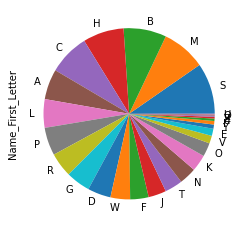

In [13]:
# EXPLORE FEATURES [Name]: 
train_data[COL_NAME_START_LETTER] = train_data[COL_NAME].map(lambda full_name: str(full_name).split(",")[0][0])
train_data[COL_NAME_START_LETTER].value_counts().plot.pie()
train_data[COL_NAME_START_LETTER].value_counts()
#Useless data, delete them

In [14]:
#Useless information about first label, delete them
try:
    train_data.drop(COL_NAME_START_LETTER, axis=1, inplace=True)
except KeyError:
    pass
train_data[:SHOW_DATA]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


C    259
B    201
E    147
D    126
A     77
F     55
G     24
n      1
T      1
Name: Cabin_Group, dtype: int64

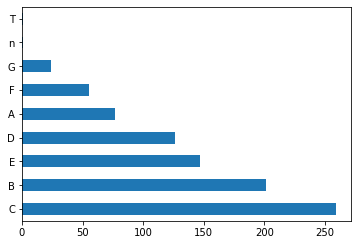

In [15]:
#  train_data[~train_data[COL_CABIN]. isna()][COL_CABIN]
# train_data[COL_CABIN] = train_data[COL_CABIN].fillna(0)
train_data[COL_CABIN] = train_data[COL_CABIN].fillna(method = "ffill")
train_data[COL_CABIN_GROUP] = train_data[COL_CABIN].map(lambda cabin_title: str(cabin_title)[0])
# train_data[COL_CABIN_GROUP].value_counts().plot.pie()
# train_data.loc[train_data[COL_CABIN_GROUP] != "0"][COL_CABIN_GROUP].value_counts().plot.pie()
# train_data.loc[train_data[COL_CABIN_GROUP] != "0"][COL_CABIN_GROUP].value_counts()
train_data[COL_CABIN_GROUP].value_counts().plot.barh()
train_data[COL_CABIN_GROUP].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

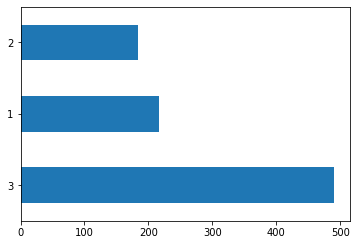

In [16]:
# EXPLORE FEATURES: another graph
# class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
train_data[COL_PASSCLASS].value_counts().plot(kind='barh', stacked=True)
train_data[COL_PASSCLASS].value_counts()

In [17]:
# As we see on barh graph class "3" is most popular between passengers  

male      577
female    314
Name: Sex, dtype: int64

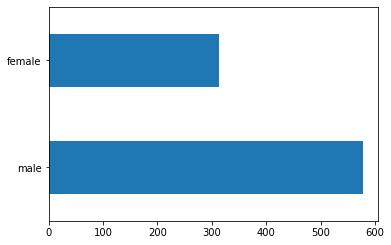

In [18]:
# EXPLORE FEATURES:
# sex - Sex
train_data[COL_SEX].value_counts().plot(kind='barh')
train_data[COL_SEX].value_counts()

In [19]:
# As we see on barh graph women was almost twice more then men, so.. how much influence does gender have on your survival on the Titanic? See later

S    644
C    168
Q     77
Name: Embarked, dtype: int64

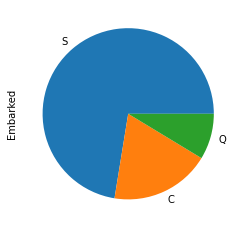

In [20]:
# EXPLORE FEATURES: 
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
train_data[COL_EPORT].value_counts().plot.pie()
train_data[COL_EPORT].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

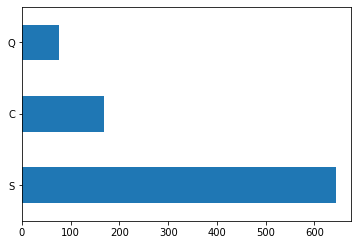

In [21]:
# EXPLORE FEATURES: 
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
train_data[COL_EPORT].value_counts().plot(kind='barh')
train_data[COL_EPORT].value_counts()

In [22]:
# As we see on barh graph, there are much more passengers from port "S" than others,  so.. how much influence does port of embarkation? See later

In [23]:
# EXPLORE FEATURES: 
# age - Age distribution
train_data[COL_AGE].mean() # Средний возраст пассажира

29.69911764705882

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

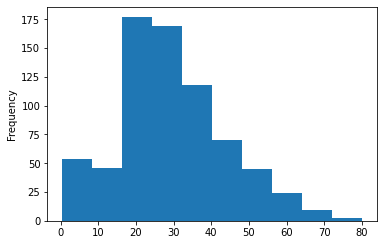

In [24]:
# Age distribution
train_data[COL_AGE].plot(kind='hist')
train_data[COL_AGE].value_counts()

In [25]:
# How many data from column 'Age' is missing (in percentage)?
train_data.isna().sum()/train_data.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin           0.112233
Embarked        0.224467
Cabin_Group     0.000000
dtype: float64

In [26]:
# Data from column 'Age' which is missing was filled using pandas module

mean_age = train_data[COL_AGE].mean()
# train_data[COL_AGE].fillna(mean_age)
train_data[COL_AGE] = train_data[COL_AGE].fillna(method = "ffill")

train_data.isna().sum()/train_data.shape[0]*100

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.112233
Embarked       0.224467
Cabin_Group    0.000000
dtype: float64

0      0.22
1      0.38
2      0.26
3      0.35
4      0.35
       ... 
886    0.27
887    0.19
888    0.19
889    0.26
890    0.32
Name: Age_Scaled, Length: 891, dtype: float64

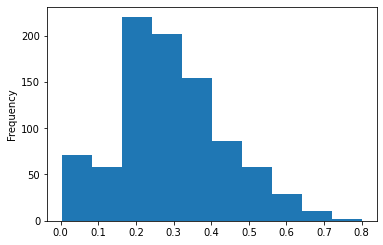

In [27]:
# ADD NEW FEATURE: COL_AGE_SCALED try explore new feature
train_data[COL_AGE_SCALED] = train_data[COL_AGE].map(lambda age: age/100)
train_data[COL_AGE_SCALED].plot(kind='hist')
train_data[COL_AGE_SCALED]
# Scaled age's data could be pretty usefull for mode

2    266
3    211
1    129
4    111
0     82
5     62
6     23
7      6
8      1
Name: Age_Group, dtype: int64

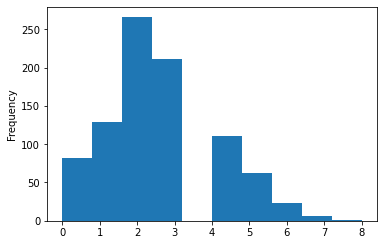

In [28]:
# ADD NEW FEATURE: COL_AGE_GROUP try explore new feature
# There were passenger belonging to age groups:
# 0: 0 - 9
# 1: 10 - 19
# 2: 20 - 29
# 3: 30 - 39
# 4: 40 - 49
# 5: 50 - 59
# 6: 60 - 69
# 7: 70 - 79
# 8: 80 - 89
# 9: 90 - 99

def COL_AGE_GROUP_process(age_delta:int  ,df: pd.DataFrame) -> pd.core.series.Series:
    df[COL_AGE] = df[COL_AGE].fillna(method = "ffill")
    return train_data[COL_AGE].map(lambda age: int(age//age_delta))

train_data[COL_AGE_GROUP] = COL_AGE_GROUP_process(10,train_data)
train_data[COL_AGE_GROUP][:SHOW_DATA]
train_data[COL_AGE_GROUP].plot(kind='hist')
train_data[COL_AGE_GROUP].value_counts()
# Should be similar to the normal distribution

2    266
3    211
1    129
4    111
0     82
5     62
6     23
7      6
8      1
Name: Age_Group, dtype: int64

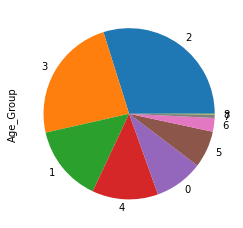

In [29]:
train_data[COL_AGE_GROUP].value_counts().plot.pie()
train_data[COL_AGE_GROUP].value_counts()

1    376
2    322
0    101
3     92
Name: Age_Group_2, dtype: int64

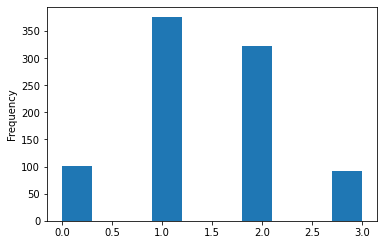

In [30]:
#but lets try with just  4 group:
# [0 < 15] - child
# [15 - 30] - teenager
# [30 - 50] - adult
# [50 > ] - aged

#categorical function for map
def categorical_age(age: float)-> int:
    if age < 15:
        return 0
    elif age <30:
        return 1
    elif age <50:
        return 2
    else:
        return 3


# For create new feature
def COL_AGE_GROUP_process_2(df: pd.DataFrame) -> pd.core.series.Series:
    # split data on 4 group: [ < 50], [50 - 100], [100 - 300], [300 > ]
    df[COL_AGE] = df[COL_AGE].fillna(method = "ffill")
    return df[COL_AGE].map(categorical_age)


train_data[COL_AGE_GROUP_2] = COL_AGE_GROUP_process_2(train_data)
train_data[COL_AGE_GROUP_2][:SHOW_DATA]
train_data[COL_AGE_GROUP_2].plot.hist()
train_data[COL_AGE_GROUP_2].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

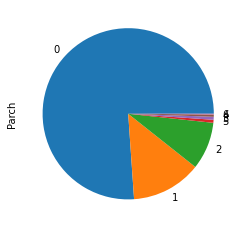

In [31]:
# EXPLORE FEATURES: 
# parch - Number of Parents/Children Aboard 
train_data[COL_PARCH].value_counts().plot.pie()
train_data[COL_PARCH].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

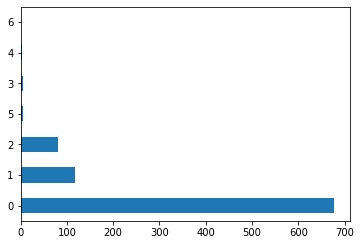

In [32]:
# EXPLORE FEATURES: 
# parch - Number of Parents/Children Aboard 
train_data[COL_PARCH].value_counts().plot(kind='barh')
train_data[COL_PARCH].value_counts()

23.905723905723907

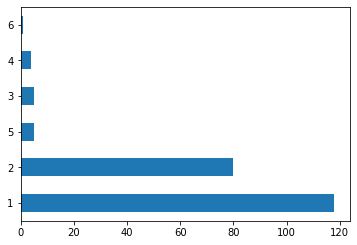

In [33]:
# Let's see only on parents
train_data[COL_PARCH].value_counts()[1:].plot(kind='barh')
sum(train_data[COL_PARCH].value_counts()[1:])/sum(train_data[COL_PARCH].value_counts())*100
# percentage of families with children in relation to the rest

0    678
1    118
2     95
Name: Parch_Group, dtype: int64

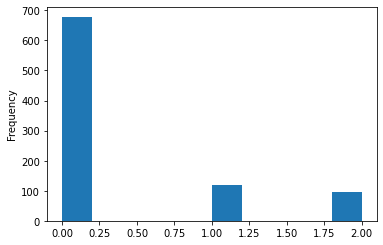

In [34]:
 # split data on 3 group: [0], [1], [2 > ]
train_data[COL_PARCH_GROUP] = train_data[COL_PARCH].map(lambda sibsp: 2 if sibsp >= 2 else sibsp) 

 # split data on 2 group: [0], [1 > ]
train_data[COL_PARCH_GROUP_2] = train_data[COL_PARCH].map(lambda sibsp: 1 if sibsp >= 1 else 0)

train_data[COL_PARCH_GROUP].plot.hist()
train_data[COL_PARCH_GROUP].value_counts()

0    678
1    213
Name: Parch_Group_2, dtype: int64

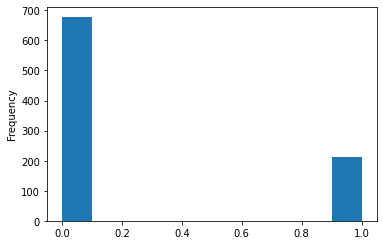

In [35]:
train_data[COL_PARCH_GROUP_2].plot.hist()
train_data[COL_PARCH_GROUP_2].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

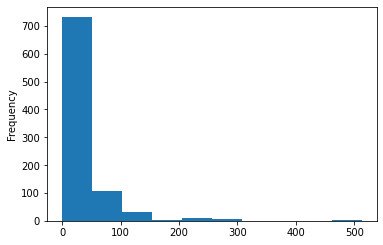

In [36]:
# EXPLORE FEATURES: 
# fare - Passenger Fare                     // could be convert to fare_group
train_data[COL_FARE].plot(kind = "hist")
train_data[COL_FARE].value_counts()

In [37]:
# As expected, the cheapest tariff is the most. Bat it doesn't informative lets make new feature: group of tariff

0     730
1     108
2      24
4      11
3       9
5       6
10      3
Name: Fare_Group, dtype: int64

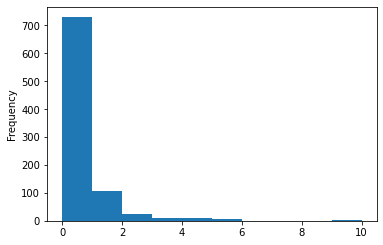

In [38]:
# For create new feature
def COL_FARE_GROUP_process(delta: int, df: pd.DataFrame) -> pd.core.series.Series:
    # split data in increments 'delta' 
    # sample: delta = 10 then fare of 0 : 0 - 9 
    #                    and  fare of 1 : 10 - 19
    #                    and ...

    df[COL_FARE] = df[COL_FARE].fillna(method = "ffill")
    return df[COL_FARE].map(lambda fare: int(fare//delta))


train_data[COL_FARE_GROUP] = COL_FARE_GROUP_process(50,train_data)
train_data[COL_FARE_GROUP][:SHOW_DATA]
train_data[COL_FARE_GROUP].plot.hist()
train_data[COL_FARE_GROUP].value_counts()

0    515
1    215
2    108
3     53
Name: Fare_Group_2, dtype: int64

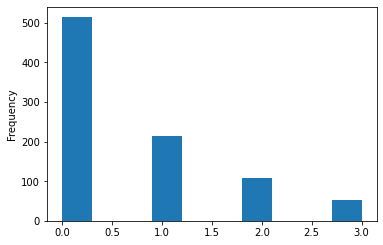

In [39]:
#but lets try with just  4 group: [ < 20], [20 - 50], [50 - 100], [100 > ]
#categorical function for map
def categorical_fare(fare: float)-> int:
    if fare < 20:
        return 0
    elif fare <50:
        return 1
    elif fare <100:
        return 2
    else:
        return 3


# For create new feature
def COL_FARE_GROUP_process_2(df: pd.DataFrame) -> pd.core.series.Series:
    # split data on 4 group: [ < 50], [50 - 100], [100 - 300], [300 > ]
    df[COL_FARE] = df[COL_FARE].fillna(method = "ffill")
    return df[COL_FARE].map(categorical_fare)


train_data[COL_FARE_GROUP_2] = COL_FARE_GROUP_process_2(train_data)
train_data[COL_FARE_GROUP_2][:SHOW_DATA]
train_data[COL_FARE_GROUP_2].plot.hist()
train_data[COL_FARE_GROUP_2].value_counts()

In [40]:
#Looks much better
train_data.groupby([COL_FARE]).size()

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Length: 248, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

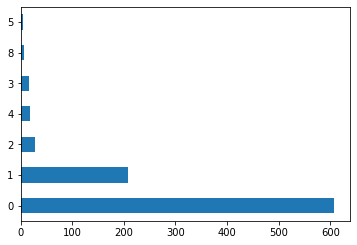

In [41]:
# EXPLORE ANOTHER FEATURES: 
# sibsp - Number of Siblings/Spouses Aboard
train_data[COL_SIBSP].value_counts().plot(kind='barh')
# train_data[COL_SIBSP].value_counts().plot.pie()
train_data[COL_SIBSP].value_counts()
# train_data.groupby([COL_SIBSP]).size()

0    608
1    209
2     74
Name: SibSp_Group, dtype: int64

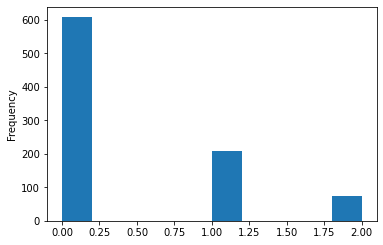

In [42]:
 # split data on 3 group: [0], [1], [2 > ]
train_data[COL_SIBSP_GROUP] = train_data[COL_SIBSP].map(lambda sibsp: 2 if sibsp >= 2 else sibsp) 

 # split data on 2 group: [0], [1 > ]
train_data[COL_SIBSP_GROUP_2] = train_data[COL_SIBSP].map(lambda sibsp: 1 if sibsp >= 1 else 0)
# train_data[COL_SIBSP_GROUP_2] = pd.cut(train_data[COL_SIBSP], bins=[0, 1, 10], include_lowest=True, labels=['0', 'mid', 'high'])
train_data[COL_SIBSP_GROUP].plot.hist()
train_data[COL_SIBSP_GROUP].value_counts()

0    608
1    283
Name: SibSp_Group_2, dtype: int64

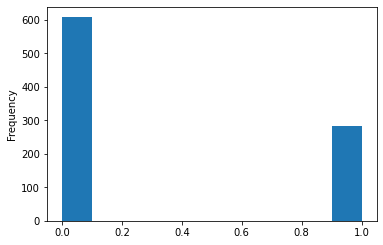

In [43]:
train_data[COL_SIBSP_GROUP_2].plot.hist()
train_data[COL_SIBSP_GROUP_2].value_counts()

In [44]:
#Look at last Ticket column
train_data[COL_TICKET]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
17421           4
349909          4
113760          4
4133            4
113781          4
Name: Ticket, dtype: int64

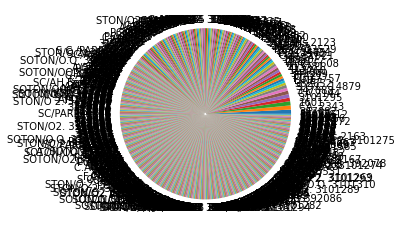

In [45]:
#Looks unusless, but lets try count elements
train_data[COL_TICKET].value_counts().plot.pie()
train_data[COL_TICKET].value_counts()[:SHOW_DATA]


In [46]:
counter_tickets = Counter(train_data[COL_TICKET])
train_data[COL_TICKET_GROUP] = train_data[COL_TICKET].map(lambda ticket: counter_tickets[ticket])

In [47]:
#also lets drop name and passengers_id
#Useless information
try:
    train_data.drop(COL_NAME, axis=1, inplace=True)
    train_data.drop(COL_PASSID, axis=1, inplace=True)
except KeyError:
    pass
train_data[:SHOW_DATA]
# Lets work with data and models

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Age_Scaled,Age_Group,Age_Group_2,Parch_Group,Parch_Group_2,Fare_Group,Fare_Group_2,SibSp_Group,SibSp_Group_2,Ticket_Group
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,...,0.22,2,1,0,0,0,0,1,1,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,...,0.38,3,2,0,0,1,2,1,1,1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,...,0.26,2,1,0,0,0,0,0,0,1
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,...,0.35,3,2,0,0,1,2,1,1,2
4,0,3,male,35.0,0,0,373450,8.0500,C123,S,...,0.35,3,2,0,0,0,0,0,0,1
5,0,3,male,35.0,0,0,330877,8.4583,C123,Q,...,0.35,3,2,0,0,0,0,0,0,1
6,0,1,male,54.0,0,0,17463,51.8625,E46,S,...,0.54,5,3,0,0,1,2,0,0,1
7,0,3,male,2.0,3,1,349909,21.0750,E46,S,...,0.02,0,0,1,1,0,1,2,1,4
8,1,3,female,27.0,0,2,347742,11.1333,E46,S,...,0.27,2,1,2,1,0,0,0,0,3
9,1,2,female,14.0,1,0,237736,30.0708,E46,C,...,0.14,1,0,0,0,0,1,1,1,2


In [48]:
# COLLISION RESEARCH
# look on all features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    object 
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Ticket         891 non-null    object 
 7   Fare           891 non-null    float64
 8   Cabin          890 non-null    object 
 9   Embarked       889 non-null    object 
 10  Cabin_Group    891 non-null    object 
 11  Age_Scaled     891 non-null    float64
 12  Age_Group      891 non-null    int64  
 13  Age_Group_2    891 non-null    int64  
 14  Parch_Group    891 non-null    int64  
 15  Parch_Group_2  891 non-null    int64  
 16  Fare_Group     891 non-null    int64  
 17  Fare_Group_2   891 non-null    int64  
 18  SibSp_Grou

<AxesSubplot:ylabel='Age_Group'>

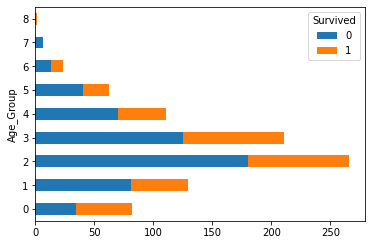

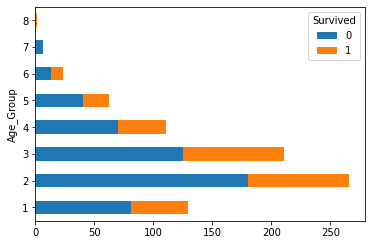

In [49]:
# combine age and survivle
survivors_by_age = train_data.groupby([COL_AGE_GROUP, COL_SURVIVED])
survivors_by_age = survivors_by_age.size().unstack()
survivors_by_age.plot(kind = "barh", stacked = True)
# delete NaN age
survivors_by_age_no_nan = survivors_by_age[1:].fillna(0)
survivors_by_age_no_nan.plot(kind = "barh", stacked = True)

<AxesSubplot:ylabel='Pclass'>

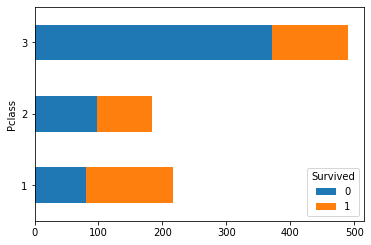

In [50]:
# COLLISION RESEARCH
# combine PClass and survivle
survivors_by_pclass = train_data.groupby([COL_PASSCLASS, COL_SURVIVED])
survivors_by_pclass = survivors_by_pclass.size().unstack()
survivors_by_pclass.plot(kind = "barh", stacked = True)


<AxesSubplot:ylabel='Sex'>

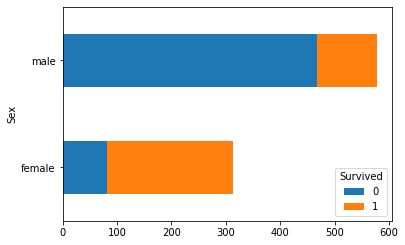

In [51]:
# COLLISION RESEARCH
# combine sex and survivle
survivors_by_sex = train_data.groupby([COL_SEX, COL_SURVIVED])
survivors_by_sex = survivors_by_sex.size().unstack()
survivors_by_sex.plot(kind = "barh", stacked = True)



In [52]:
# convert to % percent
def map_to_percent(r):
    return [float(v)/sum(r) for v in r]


<AxesSubplot:>

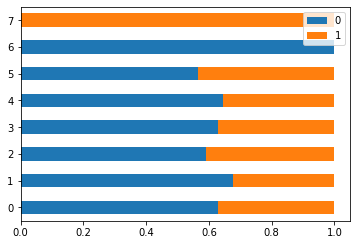

In [53]:
# convert to % percent age & survivle
survivors_by_age_no_nan_percentage = pd.DataFrame([*survivors_by_age_no_nan.apply(map_to_percent, axis = 1)],columns = ["0","1"])
survivors_by_age_no_nan_percentage.plot(kind = "barh", stacked=True)


<AxesSubplot:>

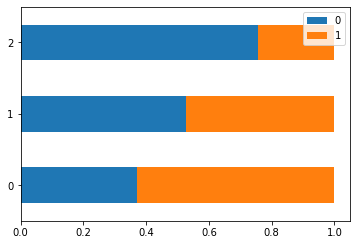

In [54]:
# convert to % percent PClass & survivle
survivors_by_pclass_percentage = pd.DataFrame([*survivors_by_pclass.apply(map_to_percent, axis = 1)],columns = ["0","1"])
survivors_by_pclass_percentage.plot(kind = "barh", stacked=True)

<AxesSubplot:>

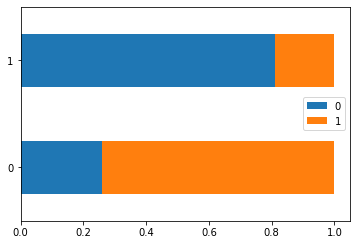

In [55]:
# convert to % percent sex & survivle
survivors_by_sex_percentage = pd.DataFrame([*survivors_by_sex.apply(map_to_percent, axis = 1)],columns = ["0","1"])
survivors_by_sex_percentage.plot(kind = "barh", stacked=True)
# 1- female
# 0 - male

In [56]:
# load data special for models
df_train = pd.read_csv("../input/titanic/train.csv")
df_test = pd.read_csv("../input/titanic/test.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [58]:
# How many data in train is missing (in percentage)?
df_train.isna().sum()/train_data.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [59]:
# How many data in train is missing (in percentage)?
df_test.isna().sum()/train_data.shape[0]*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
dtype: float64

In [60]:
age_delta = 10
fare_delta = 50

In [61]:
#PREPREPARE DATA df_train
##  0   PassengerId  891 non-null    int64--------------------------------------
##  1   Survived     891 non-null    int64--------------------------------------
##  2   Pclass       891 non-null    int64 --------------------------------------
COL_PASSCLASS_D = COL_PASSCLASS+"_D"
df_train[COL_PASSCLASS_D] = df_train[COL_PASSCLASS]
df_train = pd.get_dummies(df_train,prefix = "PCLASS",columns=[COL_PASSCLASS_D])
##  3   Name         891 non-null    object--------------------------------------
# try:
#     df_train.drop(COL_NAME, axis=1, inplace=True)
# except KeyError:
#     pass
df_train[COL_NAME_START_LETTER] = df_train[COL_NAME].map(lambda full_name: str(full_name).split(",")[0][0])

COL_NAME_START_LETTER_D = COL_NAME_START_LETTER+"_D"
df_train[COL_NAME_START_LETTER_D] = df_train[COL_NAME_START_LETTER]
df_train = pd.get_dummies(df_train,prefix = "N_LETTER",columns=[COL_NAME_START_LETTER_D])
##  4   Sex          891 non-null    object --------------------------------------
##  5   Age          714 non-null    float64--------------------------------------
df_train[COL_AGE] = df_train[COL_AGE].fillna(method = "ffill")
df_train[COL_AGE_SCALED] = df_train[COL_AGE].map(lambda age: age/100)

df_train[COL_AGE_GROUP] = COL_AGE_GROUP_process(age_delta,df_train)
COL_AGE_GROUP_D = COL_AGE_GROUP+"_D"
df_train[COL_AGE_GROUP_D] = df_train[COL_AGE_GROUP]
df_train = pd.get_dummies(df_train,prefix = "AGE",columns=[COL_AGE_GROUP_D])


df_train[COL_AGE_GROUP_2] = COL_AGE_GROUP_process_2(df_train)
COL_AGE_GROUP_2_D = COL_AGE_GROUP_2+"_D"
df_train[COL_AGE_GROUP_2_D] = df_train[COL_AGE_GROUP_2]
df_train = pd.get_dummies(df_train,prefix = "AGE_2",columns=[COL_AGE_GROUP_2_D])
##  6   SibSp        891 non-null    int64 --------------------------------------

df_train[COL_SIBSP_GROUP] = df_train[COL_SIBSP].map(lambda sibsp: 2 if sibsp >= 2 else sibsp) 
COL_SIBSP_GROUP_D = COL_SIBSP_GROUP+"_D"
df_train[COL_SIBSP_GROUP_D] = df_train[COL_SIBSP_GROUP]
df_train = pd.get_dummies(df_train,prefix = "SIBSP",columns=[COL_SIBSP_GROUP_D])


df_train[COL_SIBSP_GROUP_2] = df_train[COL_SIBSP].map(lambda sibsp: 1 if sibsp >= 1 else 0)
COL_SIBSP_GROUP_2_D = COL_SIBSP_GROUP_2+"_D"
df_train[COL_SIBSP_GROUP_2_D] = df_train[COL_SIBSP_GROUP_2]
df_train = pd.get_dummies(df_train,prefix = "SIBSP_2",columns=[COL_SIBSP_GROUP_2_D])

##  7   Parch        891 non-null    int64 --------------------------------------
df_train[COL_PARCH_GROUP] = df_train[COL_PARCH].map(lambda sibsp: 2 if sibsp >= 2 else sibsp)
COL_PARCH_GROUP_D = COL_PARCH_GROUP+"_D"
df_train[COL_PARCH_GROUP_D] = df_train[COL_PARCH_GROUP]
df_train = pd.get_dummies(df_train,prefix = "PARCH",columns=[COL_PARCH_GROUP_D])

df_train[COL_PARCH_GROUP_2] = df_train[COL_PARCH].map(lambda sibsp: 1 if sibsp >= 1 else 0)
COL_PARCH_GROUP_2_D = COL_PARCH_GROUP_2+"_D"
df_train[COL_PARCH_GROUP_2_D] = df_train[COL_PARCH_GROUP_2]
df_train = pd.get_dummies(df_train,prefix = "PARCH_2",columns=[COL_PARCH_GROUP_2_D])
##  8   Ticket       891 non-null    object --------------------------------------
counter_tickets = Counter(df_train[COL_TICKET])
df_train[COL_TICKET_GROUP] = df_train[COL_TICKET].map(lambda ticket: counter_tickets[ticket])

COL_TICKET_GROUP_D = COL_TICKET_GROUP+"_D"
df_train[COL_TICKET_GROUP_D] = df_train[COL_TICKET_GROUP]
df_train = pd.get_dummies(df_train,prefix = "TICKET",columns=[COL_TICKET_GROUP_D])
##  9   Fare         891 non-null    float64--------------------------------------
df_train[COL_FARE] = df_train[COL_FARE].fillna(method = "ffill")

df_train[COL_FARE_GROUP] = COL_FARE_GROUP_process(fare_delta,df_train)
COL_FARE_GROUP_D = COL_FARE_GROUP+"_D"
df_train[COL_FARE_GROUP_D] = df_train[COL_FARE_GROUP]
df_train = pd.get_dummies(df_train,prefix = "FARE",columns=[COL_FARE_GROUP_D])

df_train[COL_FARE_GROUP_2] = COL_FARE_GROUP_process_2(df_train)
COL_FARE_GROUP_2_D = COL_FARE_GROUP_2+"_D"
df_train[COL_FARE_GROUP_2_D] = df_train[COL_FARE_GROUP_2]
df_train = pd.get_dummies(df_train,prefix = "FARE_2",columns=[COL_FARE_GROUP_2_D])
##  10  Cabin        204 non-null    object --------------------------------------
# try:
#     df_train.drop(COL_CABIN, axis=1, inplace=True)
# except KeyError:
#     pass
df_train[COL_CABIN] = df_train[COL_CABIN].fillna(method = "ffill")
df_train[COL_CABIN_GROUP] = df_train[COL_CABIN].map(lambda cabin_title: str(cabin_title)[0])

COL_CABIN_GROUP_D = COL_CABIN_GROUP+"_D"
df_train[COL_CABIN_GROUP_D] = df_train[COL_CABIN_GROUP]
df_train = pd.get_dummies(df_train,prefix = "CABIN",columns=[COL_CABIN_GROUP])
##  11  Embarked     889 non-null    object --------------------------------------
COL_EPORT_D = COL_EPORT+"_D"
df_train[COL_EPORT_D] = df_train[COL_EPORT]
df_train = pd.get_dummies(df_train,prefix = "EPORT",columns=[COL_EPORT_D])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 107 entries, PassengerId to EPORT_S
dtypes: float64(3), int64(14), object(7), uint8(83)
memory usage: 239.4+ KB


In [62]:
df_train[:SHOW_DATA]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,CABIN_C,CABIN_D,CABIN_E,CABIN_F,CABIN_G,CABIN_T,CABIN_n,EPORT_C,EPORT_Q,EPORT_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,0,0,0,0,0,0,0,1
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,...,1,0,0,0,0,0,0,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,0,1,0,0,0,0,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,0,1,0,0,0,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,0,1,0,0,0,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,0,1,0,0,0,0,1,0,0


In [63]:
#PREPREPARE DATA df_test
##  0   PassengerId  891 non-null    int64--------------------------------------
##  1   Survived     891 non-null    int64--------------------------------------
##  2   Pclass       891 non-null    int64 --------------------------------------
COL_PASSCLASS_D = COL_PASSCLASS+"_D"
df_test[COL_PASSCLASS_D] = df_test[COL_PASSCLASS]
df_test = pd.get_dummies(df_test,prefix = "PCLASS",columns=[COL_PASSCLASS_D])
##  3   Name         891 non-null    object--------------------------------------
# try:
#     df_test.drop(COL_NAME, axis=1, inplace=True)
# except KeyError:
#     pass
df_test[COL_NAME_START_LETTER] = df_test[COL_NAME].map(lambda full_name: str(full_name).split(",")[0][0])

COL_NAME_START_LETTER_D = COL_NAME_START_LETTER+"_D"
df_train[COL_NAME_START_LETTER_D] = df_train[COL_NAME_START_LETTER]
df_test = pd.get_dummies(df_test,prefix = "N_LETTER",columns=[COL_NAME_START_LETTER])
df_test["N_LETTER_U"] = pd.DataFrame(np.zeros(df_test["N_LETTER_M"].shape),dtype="uint8")
df_test["N_LETTER_Y"] = pd.DataFrame(np.zeros(df_test["N_LETTER_M"].shape),dtype="uint8")
##  4   Sex          891 non-null    object --------------------------------------
##  5   Age          714 non-null    float64--------------------------------------
df_test[COL_AGE] = df_test[COL_AGE].fillna(method = "ffill")
df_test[COL_AGE_SCALED] = df_test[COL_AGE].map(lambda age: age/100)

df_test[COL_AGE_GROUP] = COL_AGE_GROUP_process(age_delta,df_test)
COL_AGE_GROUP_D = COL_AGE_GROUP+"_D"
df_test[COL_AGE_GROUP_D] = df_test[COL_AGE_GROUP]
df_test = pd.get_dummies(df_test,prefix = "AGE",columns=[COL_AGE_GROUP_D])
df_test["AGE_8"] = pd.DataFrame(np.zeros(df_test["AGE_7"].shape),dtype="uint8")


df_test[COL_AGE_GROUP_2] = COL_AGE_GROUP_process_2(df_test)
COL_AGE_GROUP_2_D = COL_AGE_GROUP_2+"_D"
df_test[COL_AGE_GROUP_2_D] = df_test[COL_AGE_GROUP_2]
df_test = pd.get_dummies(df_test,prefix = "AGE_2",columns=[COL_AGE_GROUP_2_D])
##  6   SibSp        891 non-null    int64 --------------------------------------

df_test[COL_SIBSP_GROUP] = df_test[COL_SIBSP].map(lambda sibsp: 2 if sibsp >= 2 else sibsp) 
COL_SIBSP_GROUP_D = COL_SIBSP_GROUP+"_D"
df_test[COL_SIBSP_GROUP_D] = df_test[COL_SIBSP_GROUP]
df_test = pd.get_dummies(df_test,prefix = "SIBSP",columns=[COL_SIBSP_GROUP_D])


df_test[COL_SIBSP_GROUP_2] = df_test[COL_SIBSP].map(lambda sibsp: 1 if sibsp >= 1 else 0)
COL_SIBSP_GROUP_2_D = COL_SIBSP_GROUP_2+"_D"
df_test[COL_SIBSP_GROUP_2_D] = df_test[COL_SIBSP_GROUP_2]
df_test = pd.get_dummies(df_test,prefix = "SIBSP_2",columns=[COL_SIBSP_GROUP_2_D])

##  7   Parch        891 non-null    int64 --------------------------------------
df_test[COL_PARCH_GROUP] = df_test[COL_PARCH].map(lambda sibsp: 2 if sibsp >= 2 else sibsp)
COL_PARCH_GROUP_D = COL_PARCH_GROUP+"_D"
df_test[COL_PARCH_GROUP_D] = df_test[COL_PARCH_GROUP]
df_test = pd.get_dummies(df_test,prefix = "PARCH",columns=[COL_PARCH_GROUP_D])

df_test[COL_PARCH_GROUP_2] = df_test[COL_PARCH].map(lambda sibsp: 1 if sibsp >= 1 else 0)
COL_PARCH_GROUP_2_D = COL_PARCH_GROUP_2+"_D"
df_test[COL_PARCH_GROUP_2_D] = df_test[COL_PARCH_GROUP_2]
df_test = pd.get_dummies(df_test,prefix = "PARCH_2",columns=[COL_PARCH_GROUP_2_D])
##  8   Ticket       891 non-null    object --------------------------------------
counter_tickets = Counter(df_train[COL_TICKET])
df_test[COL_TICKET_GROUP] = df_test[COL_TICKET].map(lambda ticket: counter_tickets[ticket])

COL_TICKET_GROUP_D = COL_TICKET_GROUP+"_D"
df_test[COL_TICKET_GROUP_D] = df_test[COL_TICKET_GROUP]
df_test = pd.get_dummies(df_test,prefix = "TICKET",columns=[COL_TICKET_GROUP_D])
##  9   Fare         891 non-null    float64--------------------------------------
df_test[COL_FARE] = df_test[COL_FARE].fillna(method = "ffill")

df_test[COL_FARE_GROUP] = COL_FARE_GROUP_process(fare_delta,df_test)
COL_FARE_GROUP_D = COL_FARE_GROUP+"_D"
df_test[COL_FARE_GROUP_D] = df_test[COL_FARE_GROUP]
df_test = pd.get_dummies(df_test,prefix = "FARE",columns=[COL_FARE_GROUP_D])

df_test[COL_FARE_GROUP_2] = COL_FARE_GROUP_process_2(df_test)
COL_FARE_GROUP_2_D = COL_FARE_GROUP_2+"_D"
df_test[COL_FARE_GROUP_2_D] = df_test[COL_FARE_GROUP_2]
df_test = pd.get_dummies(df_test,prefix = "FARE_2",columns=[COL_FARE_GROUP_2_D])
##  10  Cabin        204 non-null    object --------------------------------------
# try:
#     df_test.drop(COL_CABIN, axis=1, inplace=True)
# except KeyError:
#     pass
df_test[COL_CABIN] = df_test[COL_CABIN].fillna(method = "ffill")
df_test[COL_CABIN_GROUP] = df_test[COL_CABIN].map(lambda cabin_title: str(cabin_title)[0])


COL_CABIN_GROUP_D = COL_CABIN_GROUP+"_D"
df_test[COL_CABIN_GROUP_D] = df_test[COL_CABIN_GROUP]
df_test = pd.get_dummies(df_test,prefix = "CABIN",columns=[COL_CABIN_GROUP_D])
df_test["CABIN_T"] = pd.DataFrame(np.zeros(df_test["CABIN_C"].shape),dtype="uint8")
##  11  Embarked     889 non-null    object --------------------------------------
COL_EPORT_D = COL_EPORT+"_D"
df_test[COL_EPORT_D] = df_test[COL_EPORT]
df_test = pd.get_dummies(df_test,prefix = "EPORT",columns=[COL_EPORT_D])

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 106 entries, PassengerId to EPORT_S
dtypes: float64(3), int64(13), object(6), uint8(84)
memory usage: 106.3+ KB


In [64]:
df_train[:SHOW_DATA]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,CABIN_D,CABIN_E,CABIN_F,CABIN_G,CABIN_T,CABIN_n,EPORT_C,EPORT_Q,EPORT_S,Name_First_Letter_D
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,0,1,B
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,1,H
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,1,F
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,1,A
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,...,0,0,0,0,0,0,0,1,0,M
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,1,0,0,0,0,0,0,1,M
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,1,0,0,0,0,0,0,1,P
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,1,0,0,0,0,0,0,1,J
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,1,0,0,0,0,1,0,0,N


In [65]:
# #PREPREPARE DATA train_data
# mean_age = train_data[COL_AGE].mean()
# # train_data[COL_AGE_NaN] = train_data[COL_AGE].fillna(mean_age)
# train_data[COL_AGE_NaN] = train_data[COL_AGE].fillna(method = "ffill")
# train_data[COL_AGE_GROUP] = train_data[COL_AGE].map(lambda age: -1 if pd.isnull(age)  else int(age//age_delta))
# train_data[COL_NAME_START_LETTER] = train_data[COL_NAME].map(lambda full_name: str(full_name).split(",")[0][0])

# COL_AGE_NO_NAN = "Age_no_NaN"
# train_data[COL_AGE_NO_NAN] = train_data["Age"].fillna( train_data["Age"].mean())
# train_data = COL_FARE_GROUP_process(delta,train_data)
# COL_AGE_SCALE = "AGE_SCALE"
# train_data[COL_AGE_SCALE] = train_data[COL_AGE_NO_NAN].map(lambda age: age/100)

# train_data[COL_AGE_GROUP] = train_data[COL_AGE_GROUP].map(lambda age: age/100)
# # train_data[COL_CABIN] = train_data[COL_CABIN].fillna(method = "ffill")
# # train_data[COL_CABIN_GROUP] = train_data[COL_CABIN].map(lambda cabin_title: str(cabin_title)[0])
# train_data["AGE_GROUP"] = train_data[COL_AGE_NaN].map(lambda age: int(age//10))

# # pd.get_dummies(train_data[COL_PASSCLASS])
# train_data = pd.get_dummies(train_data,prefix = "PCLASS",columns=[COL_PASSCLASS])
# train_data = pd.get_dummies(train_data,prefix = "EPORT",columns=[COL_EPORT])
# train_data = pd.get_dummies(train_data,prefix = "SIBSP",columns=[COL_SIBSP])
# train_data = pd.get_dummies(train_data,prefix = "N_LETTER",columns=[COL_NAME_START_LETTER])
# train_data = pd.get_dummies(train_data,prefix = "AGE_N",columns=["AGE_GROUP"])

# #  train_data[~train_data[COL_CABIN]. isna()][COL_CABIN]
# # train_data[COL_CABIN] = train_data[COL_CABIN].fillna(0)
# # train_data[COL_CABIN] = train_data[COL_CABIN].fillna(method = "ffill")
# # train_data[COL_CABIN_GROUP] = train_data[COL_CABIN].map(lambda cabin_title: str(cabin_title)[0])
# # train_data[COL_CABIN_GROUP].value_counts().plot.pie()
# # train_data.loc[train_data[COL_CABIN_GROUP] != "0"][COL_CABIN_GROUP].value_counts().plot.pie()
# # train_data.loc[train_data[COL_CABIN_GROUP] != "0"][COL_CABIN_GROUP].value_counts()
# # train_data[COL_CABIN_GROUP].value_counts().plot.pie()
# train_data.info()

In [66]:
# test_data.loc[test_data[COL_FARE].isnull()]

In [67]:
#PREPREPARE DATA test
# COL_AGE_NO_NAN = "Age_no_NaN"
# mean_age = train_data[COL_AGE].mean()
# # train_data[COL_AGE_NaN] = train_data[COL_AGE].fillna(mean_age)
# test_data[COL_AGE_NaN] = test_data[COL_AGE].fillna(method = "ffill")
# test_data[COL_AGE_GROUP] = test_data[COL_AGE].map(lambda age: -1 if pd.isnull(age)  else int(age//age_delta))
# test_data[COL_NAME_START_LETTER] = test_data[COL_NAME].map(lambda full_name: str(full_name).split(",")[0][0])

# train_data[COL_AGE_GROUP] = train_data[COL_AGE_GROUP].map(lambda age: age/100)
# test_data[COL_AGE_NO_NAN] = test_data["Age"].fillna(test_data["Age"].mean())
# test_data = COL_FARE_GROUP_process(delta,test_data)
# COL_AGE_SCALE = "AGE_SCALE"
# test_data[COL_AGE_SCALE] = test_data[COL_AGE_NO_NAN].map(lambda age: age/100)
# test_data[COL_CABIN] = test_data[COL_CABIN].fillna(method = "ffill")
# test_data[COL_CABIN_GROUP] = test_data[COL_CABIN].map(lambda cabin_title: str(cabin_title)[0])
# test_data = pd.get_dummies(test_data,prefix = "CABIN",columns=[COL_CABIN_GROUP])

# # train_data[COL_AGE_GROUP] = train_data[COL_AGE].map(lambda age: -1 if pd.isnull(age)  else int(age//age_delta))
# test_data["AGE_GROUP"] = test_data[COL_AGE_NaN].map(lambda age: int(age//age_delta))


# test_data = pd.get_dummies(test_data,prefix = "CABIN",columns=[COL_CABIN_GROUP])
# # pd.get_dummies(train_data[COL_PASSCLASS])
# test_data = pd.get_dummies(test_data,prefix = "PCLASS",columns=[COL_PASSCLASS])
# test_data = pd.get_dummies(test_data,prefix = "EPORT",columns=[COL_EPORT])
# test_data = pd.get_dummies(test_data,prefix = "SIBSP",columns=[COL_SIBSP])
# test_data = pd.get_dummies(test_data,prefix = "N_LETTER",columns=[COL_NAME_START_LETTER])
# test_data = pd.get_dummies(test_data,prefix = "AGE_N",columns=["AGE_GROUP"])

# test_data["AGE_N_8"] = pd.DataFrame(np.zeros(test_data["AGE_N_7"].shape),dtype="uint8")

# test_data.info()


In [68]:
df_train.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'PCLASS_1',
 'PCLASS_2',
 'PCLASS_3',
 'Name_First_Letter',
 'N_LETTER_A',
 'N_LETTER_B',
 'N_LETTER_C',
 'N_LETTER_D',
 'N_LETTER_E',
 'N_LETTER_F',
 'N_LETTER_G',
 'N_LETTER_H',
 'N_LETTER_I',
 'N_LETTER_J',
 'N_LETTER_K',
 'N_LETTER_L',
 'N_LETTER_M',
 'N_LETTER_N',
 'N_LETTER_O',
 'N_LETTER_P',
 'N_LETTER_Q',
 'N_LETTER_R',
 'N_LETTER_S',
 'N_LETTER_T',
 'N_LETTER_U',
 'N_LETTER_V',
 'N_LETTER_W',
 'N_LETTER_Y',
 'N_LETTER_Z',
 'N_LETTER_d',
 'N_LETTER_v',
 'Age_Scaled',
 'Age_Group',
 'AGE_0',
 'AGE_1',
 'AGE_2',
 'AGE_3',
 'AGE_4',
 'AGE_5',
 'AGE_6',
 'AGE_7',
 'AGE_8',
 'Age_Group_2',
 'AGE_2_0',
 'AGE_2_1',
 'AGE_2_2',
 'AGE_2_3',
 'SibSp_Group',
 'SIBSP_0',
 'SIBSP_1',
 'SIBSP_2',
 'SibSp_Group_2',
 'SIBSP_2_0',
 'SIBSP_2_1',
 'Parch_Group',
 'PARCH_0',
 'PARCH_1',
 'PARCH_2',
 'Parch_Group_2',
 'PARCH_2_0',
 'PARCH_2_1',
 'Ticket_Group',
 'TICKET_1

In [69]:

df = df_train
td = df_test

df_y = df[COL_SURVIVED]
# del df[COL_SURVIVED]
df_x = df



# delimiter = 0.30
# lenght = int(len(df)*(1-delimiter))
# train = df[:lenght]
# test = df[lenght:]
# [df.shape,train.shape,\
# test.shape,]

In [70]:
# train.shape

In [71]:
# prepare data for train model


X_train, X_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.33, random_state=0)
[X_train.shape,\
X_test.shape,\
y_test.shape,\
y_train.shape]

[(596, 108), (295, 108), (295,), (596,)]

In [72]:
features_1 = [
 'Pclass',
#  'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
#  'Ticket',
 'Fare',
#  'Cabin',
 'Embarked',
#  'PCLASS_1',
#  'PCLASS_2',
#  'PCLASS_3',
#  'Name_First_Letter',
# "N_LETTER_A",  
"N_LETTER_B",  
"N_LETTER_C",  
"N_LETTER_D",  
"N_LETTER_E",  
"N_LETTER_F",  
"N_LETTER_G",  
"N_LETTER_H",  
# "N_LETTER_I",  
"N_LETTER_J",  
"N_LETTER_K",  
"N_LETTER_L",  
"N_LETTER_M",  
"N_LETTER_N",  
"N_LETTER_O",  
"N_LETTER_P",  
# "N_LETTER_Q",  
"N_LETTER_R",  
"N_LETTER_S",
"N_LETTER_T",  
# "N_LETTER_U",  
# "N_LETTER_V",  
# "N_LETTER_W",  
# "N_LETTER_Y",  
# "N_LETTER_Z",  
# # "N_LETTER_d",  
# # "N_LETTER_v", 
#  'Age_Scaled',
 'Age_Group',
#  'AGE_0',
#  'AGE_1',
#  'AGE_2',
#  'AGE_3',
#  'AGE_4',
#  'AGE_5',
#  'AGE_6',
#  'AGE_7',
 'AGE_8',
 'Age_Group_2',
#  'AGE_2_0',
#  'AGE_2_1',
#  'AGE_2_2',
#  'AGE_2_3',
#  'SibSp_Group',
#  'SIBSP_0',
#  'SIBSP_1',
#  'SIBSP_2',
 'SibSp_Group_2',
#  'SIBSP_2_0',
#  'SIBSP_2_1',
 'Parch_Group',
#  'PARCH_0',
#  'PARCH_1',
#  'PARCH_2',
 'Parch_Group_2',
#  'PARCH_2_0',
#  'PARCH_2_1',
#  'Ticket_Group',
#  'TICKET_1',
#  'TICKET_2',
#  'TICKET_3',
#  'TICKET_4',
#  'TICKET_5',
#  'TICKET_6',
#  'TICKET_7',
 'Fare_Group',
#  'FARE_0',
#  'FARE_1',
#  'FARE_2',
#  'FARE_3',
#  'FARE_4',
#  'FARE_5',
#  'FARE_10',
 'Fare_Group_2',
#  'FARE_2_0',
#  'FARE_2_1',
#  'FARE_2_2',
#  'FARE_2_3',
#  'Cabin_Group_D',
#  'CABIN_A',
#  'CABIN_B',
#  'CABIN_C',
#  'CABIN_D',
#  'CABIN_E',
#  'CABIN_F',
#  'CABIN_G',
#  'CABIN_T',
#  'CABIN_n',
#  'EPORT_C',
#  'EPORT_Q',
#  'EPORT_S',
#  'Name_First_Letter_D'
]
features_list = [
    'Sex',
#     'Age',
    'Age_Scaled',
    'Pclass',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked',
#     'Ticket_Group',
    [
        'TICKET_1',
        'TICKET_2',
         'TICKET_3',
         'TICKET_4',
         'TICKET_5',
         'TICKET_6',
         'TICKET_7',
    ] ,
    'Age_Group', 
    'SibSp_Group',
    'Parch_Group',
    'Fare_Group',
    'SibSp_Group_2',
    'Parch_Group_2',
    'Fare_Group_2',
# #    
] 
# y = train["Survived"]
# X = pd.get_dummies(train[features])
# X_test = pd.get_dummies(test[features])
# ----- 
# X,y = pd.get_dummies(X_train[features]), y_train
# test_X = pd.get_dummies(X_test[features])
# [X_train.shape,\
# X_test.shape,\
# y_test.shape,\
# y_train.shape]


In [73]:
# create a lot of features for research
features = {}
temporary_list = []
for number,feature  in enumerate(features_list):
    if type(feature) == str:
        temporary_list.append(feature)
    elif type(feature) == list:
         temporary_list.extend(feature)
    features[number] = temporary_list
    temporary_list = temporary_list.copy()
len(features)

15

In [74]:
models = {}
for number,feature in features.items():
    X,y = pd.get_dummies(X_train[feature]), y_train
    test_X = pd.get_dummies(X_test[feature])
    clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=1)
    clf.fit(X,y)
    models[number] = clf
models

{0: RandomForestClassifier(max_depth=6, random_state=1),
 1: RandomForestClassifier(max_depth=6, random_state=1),
 2: RandomForestClassifier(max_depth=6, random_state=1),
 3: RandomForestClassifier(max_depth=6, random_state=1),
 4: RandomForestClassifier(max_depth=6, random_state=1),
 5: RandomForestClassifier(max_depth=6, random_state=1),
 6: RandomForestClassifier(max_depth=6, random_state=1),
 7: RandomForestClassifier(max_depth=6, random_state=1),
 8: RandomForestClassifier(max_depth=6, random_state=1),
 9: RandomForestClassifier(max_depth=6, random_state=1),
 10: RandomForestClassifier(max_depth=6, random_state=1),
 11: RandomForestClassifier(max_depth=6, random_state=1),
 12: RandomForestClassifier(max_depth=6, random_state=1),
 13: RandomForestClassifier(max_depth=6, random_state=1),
 14: RandomForestClassifier(max_depth=6, random_state=1)}

In [75]:
# clf = RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=1)
# clf.fit(X,y)
# predictions = clf.predict(test_X)

# output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': predictions})
# # output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

# # X_test[COL_PASSID]
# print(classification_report(y_test,predictions))

In [76]:
result_of_prediction = {}
conf_matrix = {}

for feature_pair, model_pair in zip(features.items(), models.items()):
    m_num, model = model_pair
    f_num, feature = feature_pair
    assert f_num == m_num , f"incorrect unpacking, feature number is {f_num} and model number is {m_num}, but should be same!"
    X,y = pd.get_dummies(X_train[feature]), y_train
    test_X = pd.get_dummies(X_test[feature])
    predictions = model.predict(test_X)
    CM = confusion_matrix(y_test,predictions)
    
    result_of_prediction[f_num] = predictions
    conf_matrix[f_num] = CM
models
#f_num, feature, m_num, model

{0: RandomForestClassifier(max_depth=6, random_state=1),
 1: RandomForestClassifier(max_depth=6, random_state=1),
 2: RandomForestClassifier(max_depth=6, random_state=1),
 3: RandomForestClassifier(max_depth=6, random_state=1),
 4: RandomForestClassifier(max_depth=6, random_state=1),
 5: RandomForestClassifier(max_depth=6, random_state=1),
 6: RandomForestClassifier(max_depth=6, random_state=1),
 7: RandomForestClassifier(max_depth=6, random_state=1),
 8: RandomForestClassifier(max_depth=6, random_state=1),
 9: RandomForestClassifier(max_depth=6, random_state=1),
 10: RandomForestClassifier(max_depth=6, random_state=1),
 11: RandomForestClassifier(max_depth=6, random_state=1),
 12: RandomForestClassifier(max_depth=6, random_state=1),
 13: RandomForestClassifier(max_depth=6, random_state=1),
 14: RandomForestClassifier(max_depth=6, random_state=1)}

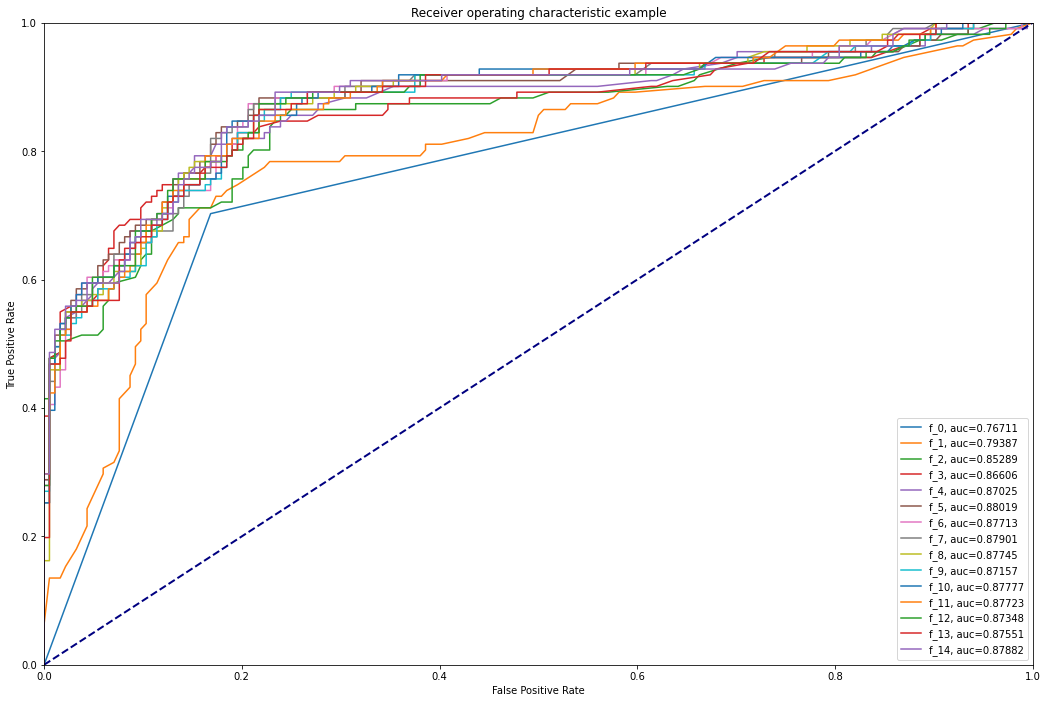

In [77]:
auc_results = {}

def cm_to_inch(value):
    return value/2.54
plt.rcParams["figure.figsize"]=(cm_to_inch(15*3),cm_to_inch(10*3))

for feature_pair, model_pair in zip(features.items(), models.items()):
    m_num, model = model_pair
    f_num, feature = feature_pair
    assert f_num == m_num , f"incorrect unpacking, feature number is {f_num} and model number is {m_num}, but should be same!"
    test_X = pd.get_dummies(X_test[feature])
    y_pred_proba = model.predict_proba(test_X)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_results[f_num] = auc
    plt.plot(fpr,tpr,label=f"f_{f_num}, auc="+str(round(auc,PERCISION)))

lw = 2
# plt.legend(loc=4)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")

# plt.savefig('ROC.png')
plt.show()

In [78]:
num_of_best_features = max(auc_results, key=lambda key: auc_results[key])
print(num_of_best_features,auc_results[num_of_best_features])
print(features[num_of_best_features])

5 0.8801899725812771
['Sex', 'Age_Scaled', 'Pclass', 'SibSp', 'Parch', 'Fare']


In [79]:
feature = features[num_of_best_features]
Y = y_train
X = pd.get_dummies(X_train[feature])
Xtest = pd.get_dummies(X_test[feature])

# prepare data for train model

model = RandomForestClassifier(n_estimators=200, max_depth=6)
# model = RandomForestClassifier(n_estimators = 1000, criterion='entropy',max_features='log2',max_depth=6, random_state=1)
model.fit(X, Y)
predictions = model.predict(Xtest)

output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


print(classification_report(y_test, output['Survived']))


Your submission was successfully saved!
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       184
           1       0.79      0.73      0.76       111

    accuracy                           0.82       295
   macro avg       0.82      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



array([[162,  22],
       [ 30,  81]])

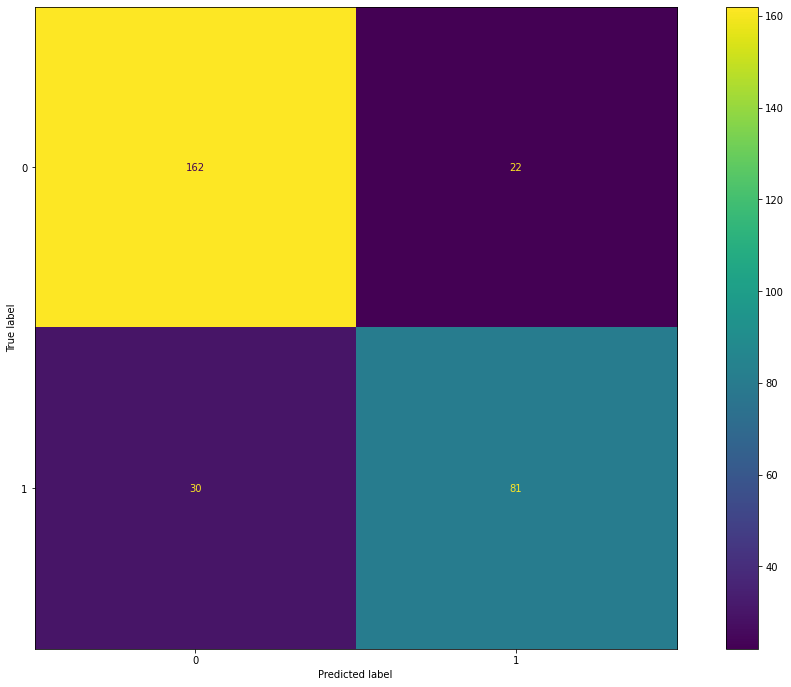

In [80]:
plot_confusion_matrix(model,pd.get_dummies(X_test[feature]), y_test)  
CM = confusion_matrix(y_test,predictions)
CM

In [81]:
feature = features[num_of_best_features]

#first test submission
# from sklearn.ensemble import RandomForestClassifier

Y = df_y
X = pd.get_dummies(df_x[feature])
Xtest = pd.get_dummies(td[feature])
# Y = df_train["Survived"]
# 

# features = ["Pclass", "Sex", "SibSp", "Parch"]
# X = pd.get_dummies(df_train[feature])
# Xtest = pd.get_dummies(df_test[feature])

model = RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=1)
# model = model = RandomForestClassifier(n_estimators=1000, max_depth=6)
model.fit(X, Y)
predictions = model.predict(Xtest)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [82]:
# # 0.78229
# features = [ 
# "Pclass", 
# "Sex", 
# "Age",
# "SibSp",  
# "Parch",  
# "Fare",
# "Embarked", 
# "N_LETTER_A",  
# "N_LETTER_B",  
# "N_LETTER_C",  
# "N_LETTER_D",  
# "N_LETTER_E",  
# "N_LETTER_F",  
# "N_LETTER_G",  
# "N_LETTER_H",  
# "N_LETTER_I",  
# "N_LETTER_J",  
# "N_LETTER_K",  
# "N_LETTER_L",  
# "N_LETTER_M",  
# "N_LETTER_N",  
# "N_LETTER_O",  
# "N_LETTER_P",  
# "N_LETTER_Q",  
# "N_LETTER_R",  
# "N_LETTER_S",  
# "N_LETTER_T",  
# "N_LETTER_U",  
# "N_LETTER_V",  
# "N_LETTER_W",  
# "N_LETTER_Y",  
# "N_LETTER_Z",  
# "N_LETTER_d",  
# "N_LETTER_v",  
# "Age_Scaled",
# "Age_Group",  
# "Age_Group_2",  
# "SibSp_Group",  
# "SibSp_Group_2",  
# "Parch_Group",  
# "Parch_Group_2",  
# "Fare_Group",   
# "Fare_Group_2",  
# "CABIN_A",  
# "CABIN_B",  
# "CABIN_C",  
# "CABIN_D",  
# "CABIN_E",  
# "CABIN_F",  
# "CABIN_G",  
# "CABIN_T",  
# "CABIN_n",  
#  ] 

# y = train["Survived"]
# X = pd.get_dummies(train[features])
# X_test = pd.get_dummies(test[features])